In [145]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,mean_squared_error

In [147]:
df=pd.read_csv("dosa_price_data.csv")
df

,Dosa,Price
0,12,16
1,8,10
2,8,10
3,10,13
4,12,16
5,10,13
6,10,13
7,12,16
8,8,10
9,8,10


In [149]:
x=df[["Dosa"]]

In [151]:
y=df[["Price"]]

In [153]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=4)

In [155]:
model=LinearRegression()


In [157]:
model.fit(xtrain,ytrain)

LinearRegression()

In [159]:
ypred=model.predict(xtest)
ypred

array([[16.],
       [13.],
       [10.],
       [13.],
       [16.],
       [16.]])

In [161]:
model.score(xtest,ytest)

1.0

In [163]:
print("MSE",mean_squared_error(ytest,ypred))

MSE 0.0


In [165]:
print("ROOT_MEAN_SQUARE",root_mean_squared_error(ytest,ypred))

ROOT_MEAN_SQUARE 0.0


In [167]:
print("MEAN_ABSOLUTE ERROR",mean_absolute_error(ytest,ypred))

MEAN_ABSOLUTE ERROR 0.0


# COST FUNCTION OF THE LINEAR MODEL

In [170]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error

In [172]:
df=pd.read_csv("house_prices.csv")
df

,House Size (sq ft),Price ($1000s)
0,500,134.934283
1,750,159.734714
2,1000,212.953771
3,1250,267.960597
4,1500,270.316933
5,1750,307.817261
6,2000,381.584256
7,2250,402.848695
8,2500,415.610512
9,2750,473.351201


In [174]:
df.rename(columns={"House Size (sq ft)":"size","Price ($1000s)":"price"},inplace=True)

In [176]:
df

,size,price
0,500,134.934283
1,750,159.734714
2,1000,212.953771
3,1250,267.960597
4,1500,270.316933
5,1750,307.817261
6,2000,381.584256
7,2250,402.848695
8,2500,415.610512
9,2750,473.351201


In [178]:
x=df[["size"]]
x

,size
0,500
1,750
2,1000
3,1250
4,1500
5,1750
6,2000
7,2250
8,2500
9,2750


In [180]:
y=df[["price"]]

In [182]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [184]:
model=LinearRegression()

In [186]:
model.fit(xtrain,ytrain)

LinearRegression()

In [188]:
ypred=model.predict(xtest)

In [190]:
ypred

array([[145.51567957],
       [180.9539496 ],
       [429.02183981],
       [322.70702972],
       [251.83048966],
       [606.21318996]])

In [192]:
model.score(x,y)

0.9924678337004083

In [194]:
print("MSE",mean_squared_error(ytest,ypred))

MSE 374.4357537625251


In [196]:
print("MAE",mean_absolute_error(ytest,ypred))

MAE 18.03510514044746


In [198]:
print("RMSE",root_mean_squared_error(ytest,ypred))

RMSE 19.35034247145319


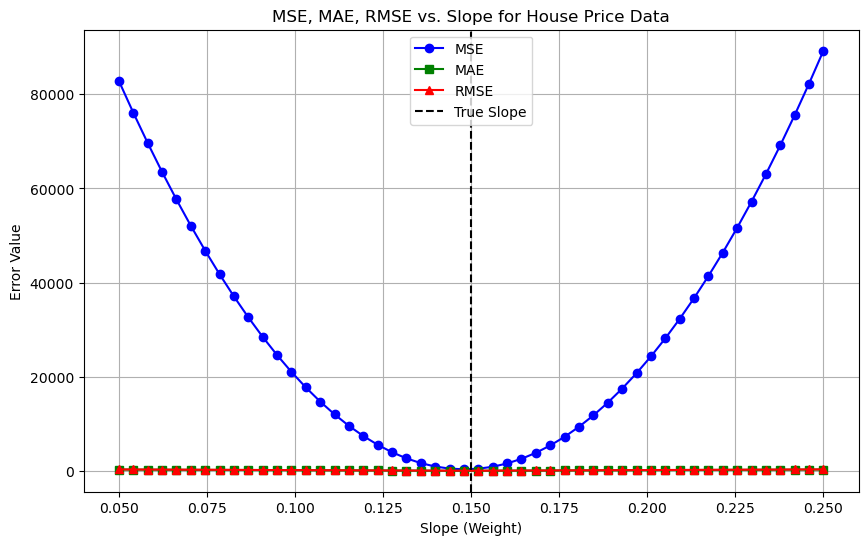

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("house_prices.csv")

# Define the true relationship (assumed from dataset)
true_slope = 0.15  # Assumed slope
true_intercept = 50  # Assumed intercept

# Extract features and target variable
house_size = df["House Size (sq ft)"]
y_true = true_intercept + true_slope * house_size  # True price without noise

# Define a range of slopes to visualize errors
slopes = np.linspace(0.05, 0.25, 50)  # Testing different slope values
mse_values, mae_values, rmse_values = [], [], []

# Calculate MSE, MAE, RMSE for each slope
for slope in slopes:
    y_pred = true_intercept + slope * house_size  # Predicted price
    errors = df["Price ($1000s)"] - y_pred  # Errors
    mse = np.mean(errors ** 2)  # Mean Squared Error
    mae = np.mean(abs(errors))  # Mean Absolute Error
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    mse_values.append(mse)
    mae_values.append(mae)
    rmse_values.append(rmse)

# Plot the error graphs
plt.figure(figsize=(10, 6))
plt.plot(slopes, mse_values, marker='o', linestyle='-', color='b', label="MSE")
plt.plot(slopes, mae_values, marker='s', linestyle='-', color='g', label="MAE")
plt.plot(slopes, rmse_values, marker='^', linestyle='-', color='r', label="RMSE")
plt.xlabel("Slope (Weight)")
plt.ylabel("Error Value")
plt.title("MSE, MAE, RMSE vs. Slope for House Price Data")
plt.axvline(x=true_slope, color='k', linestyle='--', label="True Slope")
plt.legend()
plt.grid()

# Show the plot
plt.show()